In [1]:
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
from pprint import pprint
from random import randint
import numpy as np
#import matplotlib as mpl
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))
set1 = cm.get_cmap(plt.get_cmap('Set1'))
tab20 = cm.get_cmap(plt.get_cmap('tab20'))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

In [2]:
StHomoCampaigns_4StHomoResources = pd.read_csv('../Data/StHomoCampaigns_4StHomoResources.csv')
HomogeResources_StHomogeCampaigns = pd.read_csv('../Data/HomogeResources_StHomogeCampaigns.csv')

In [3]:
# Get GA
StHomoCampaigns_4StHomoResourcesGA   = StHomoCampaigns_4StHomoResources[StHomoCampaigns_4StHomoResources['planner'] == 'GA']
StHomoCampaigns_4StHomoResourcesGA25 = StHomoCampaigns_4StHomoResources[StHomoCampaigns_4StHomoResources['planner'] == 'GA-25']
StHomoCampaigns_4StHomoResourcesGA50 = StHomoCampaigns_4StHomoResources[StHomoCampaigns_4StHomoResources['planner'] == 'GA-50']

HomogeResources_StHomogeCampaignsGA   = HomogeResources_StHomogeCampaigns[HomogeResources_StHomogeCampaigns['planner'] == 'GA']
HomogeResources_StHomogeCampaignsGA25 = HomogeResources_StHomogeCampaigns[HomogeResources_StHomogeCampaigns['planner'] == 'GA-25']
HomogeResources_StHomogeCampaignsGA50 = HomogeResources_StHomogeCampaigns[HomogeResources_StHomogeCampaigns['planner'] == 'GA-50']

In [4]:
workflows_sizes = [4, 8, 16, 32, 64, 128, 256, 512, 1024]
CrHomoCampaigns_4StResourcesGA  = pd.DataFrame(columns=['size','rate'])
CrHomoCampaigns_4StResourcesGA25 = pd.DataFrame(columns=['size','rate'])
CrHomoCampaigns_4StResourcesGA50 = pd.DataFrame(columns=['size','rate'])

for size in workflows_sizes:
    pos = 0
    temp = StHomoCampaigns_4StHomoResourcesGA[StHomoCampaigns_4StHomoResourcesGA['size'] == size]
    for _, row in temp.iterrows():
        if row['makespan'] == (75000 * size / 4):
            pos += 1
    CrHomoCampaigns_4StResourcesGA.loc[len(CrHomoCampaigns_4StResourcesGA)] = [size, pos / len(temp)]
    
for size in workflows_sizes:
    pos = 0
    temp = StHomoCampaigns_4StHomoResourcesGA25[StHomoCampaigns_4StHomoResourcesGA25['size'] == size]
    for _, row in temp.iterrows():
        if row['makespan'] == (75000 * size / 4):
            pos += 1
    CrHomoCampaigns_4StResourcesGA25.loc[len(CrHomoCampaigns_4StResourcesGA25)] = [size, pos / len(temp)]

for size in workflows_sizes:
    pos = 0
    temp = StHomoCampaigns_4StHomoResourcesGA50[StHomoCampaigns_4StHomoResourcesGA50['size'] == size]
    for _, row in temp.iterrows():
        if row['makespan'] == (75000 * size / 4):
            pos += 1
    CrHomoCampaigns_4StResourcesGA50.loc[len(CrHomoCampaigns_4StResourcesGA50)] = [size, pos / len(temp)]    

In [5]:
resources_sizes = [4, 8, 16, 32, 64, 128]
CrHomoResources_CampaignGA  = pd.DataFrame(columns=['size','rate'])
CrHomoResources_CampaignGA25 = pd.DataFrame(columns=['size','rate'])
CrHomoResources_CampaignGA50 = pd.DataFrame(columns=['size','rate'])

for size in resources_sizes:
    pos = 0
    temp = HomogeResources_StHomogeCampaignsGA[HomogeResources_StHomogeCampaignsGA['size'] == size]
    for _, row in temp.iterrows():
        if row['makespan'] == (75000 * 1024 / size):
            pos += 1
    CrHomoResources_CampaignGA.loc[len(CrHomoResources_CampaignGA)] = [size, pos / len(temp)]
    
for size in resources_sizes:
    pos = 0
    temp = HomogeResources_StHomogeCampaignsGA25[HomogeResources_StHomogeCampaignsGA25['size'] == size]
    for _, row in temp.iterrows():
        if row['makespan'] == (75000 * 1024 / size):
            pos += 1
    CrHomoResources_CampaignGA25.loc[len(CrHomoResources_CampaignGA25)] = [size, pos / len(temp)]

for size in resources_sizes:
    pos = 0
    temp = HomogeResources_StHomogeCampaignsGA50[HomogeResources_StHomogeCampaignsGA50['size'] == size]
    for _, row in temp.iterrows():
        if row['makespan'] == (75000 * 1024 / size):
            pos += 1
    CrHomoResources_CampaignGA50.loc[len(CrHomoResources_CampaignGA50)] = [size, pos / len(temp)]    

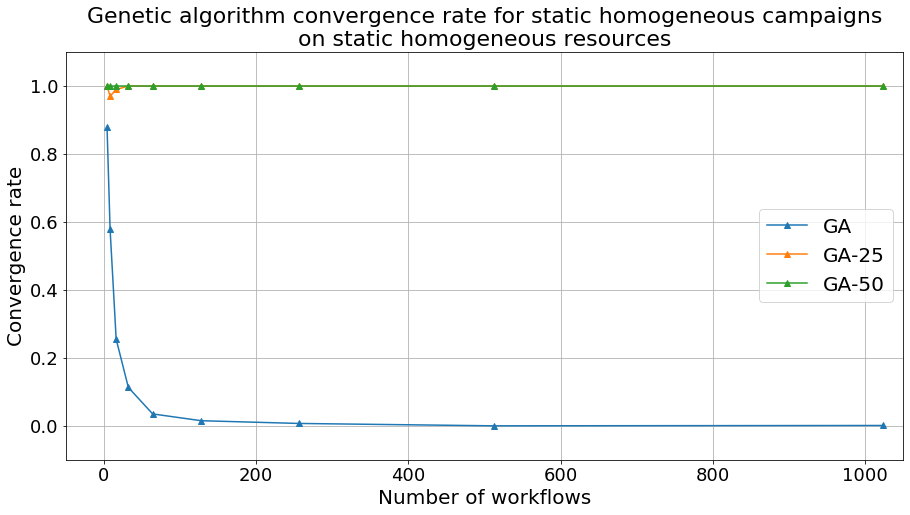

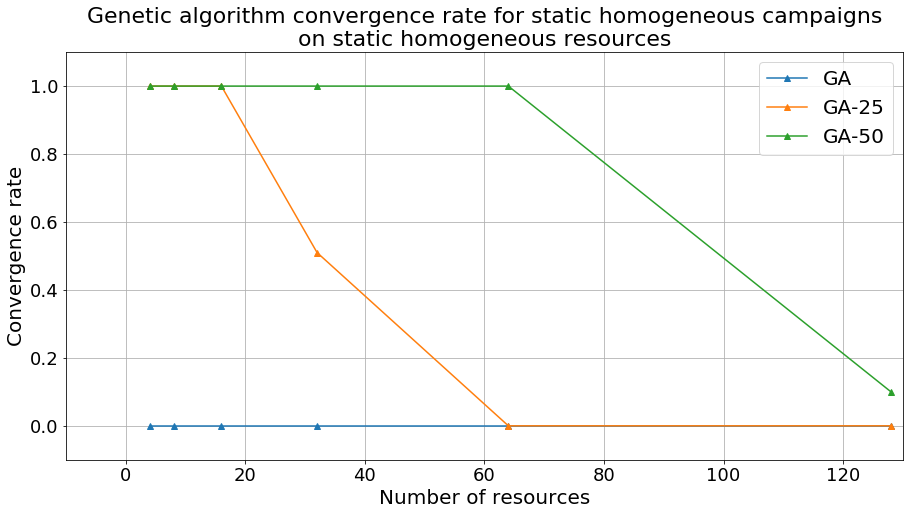

In [15]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.plot(CrHomoCampaigns_4StResourcesGA['size'], CrHomoCampaigns_4StResourcesGA['rate'], marker='^', label='GA')
_ = axis.plot(CrHomoCampaigns_4StResourcesGA25['size'], CrHomoCampaigns_4StResourcesGA25['rate'], marker='^', label='GA-25')
_ = axis.plot(CrHomoCampaigns_4StResourcesGA50['size'], CrHomoCampaigns_4StResourcesGA50['rate'], marker='^', label='GA-50')
_ = axis.set_ylabel('Convergence rate',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_ylim([-.1,1.1])
_ = axis.set_xlim([-50,1050])
_ = axis.set_xticks([0,200,400,600,800,1000])
_ = axis.set_yticks([0,0.2,0.4,0.6,0.8,1])
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()).astype('float').tolist(),fontsize=18)
_ = axis.legend(fontsize=20)
_ = axis.grid('on')
_ = axis.set_title('Genetic algorithm convergence rate for static homogeneous campaigns\non static homogeneous resources', fontsize=22)
fig.savefig('GAconv_StHomoCampaigns_4SyHomoResources.pdf',bbox_inches='tight')

fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))

_ = axis.plot(CrHomoResources_CampaignGA['size'], CrHomoResources_CampaignGA['rate'], marker='^', label='GA')
_ = axis.plot(CrHomoResources_CampaignGA25['size'], CrHomoResources_CampaignGA25['rate'], marker='^', label='GA-25')
_ = axis.plot(CrHomoResources_CampaignGA50['size'], CrHomoResources_CampaignGA50['rate'], marker='^', label='GA-50')
_ = axis.set_yscale('symlog')
_ = axis.set_ylabel('Convergence rate',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_ylim([-.1,1.1])
_ = axis.set_xlim([-10,130])
_ = axis.set_xticks([0,20,40,60,80,100, 120])
_ = axis.set_yticks([0,0.2,0.4,0.6,0.8,1])
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()).astype('float').tolist(),fontsize=18)
_ = axis.legend(fontsize=20)
_ = axis.grid('on')
_ = axis.set_title('Genetic algorithm convergence rate for static homogeneous campaigns\non static homogeneous resources', fontsize=22)
fig.savefig('GAconv_StrHomoResources_StHomoCampaigns.pdf', bbox_inches='tight')